In [1]:
import numpy as np
import pandas as pd

# Modelo simple de regresion

In [2]:
X =pd.read_csv("C:/Users/sergi/modalidad/X.csv", encoding = 'utf-8')

In [3]:
X

,X,Y,OBJECTID,RADICADO,PERIODO,MES,DIA
0,-75.596093,6.256489,709812.0,1674223.0,2019.0,6.0,9.0
1,-75.583161,6.250155,709813.0,1675562.0,2019.0,6.0,21.0
2,-75.563856,6.250657,709814.0,1661788.0,2019.0,2.0,27.0
3,-75.576757,6.268025,709815.0,1675911.0,2019.0,6.0,25.0
4,-75.571897,6.202827,709816.0,1673388.0,2019.0,6.0,4.0
...,...,...,...,...,...,...,...
30902,-75.567508,6.264408,741806.0,1681376.0,2019.0,8.0,6.0
30903,-75.561641,6.292987,741808.0,1676968.0,2019.0,7.0,5.0
30904,-75.554297,6.300337,741809.0,1683784.0,2019.0,8.0,23.0
30905,-75.602539,6.243216,741810.0,1679119.0,2019.0,7.0,19.0


In [4]:
X.shape

(30907, 7)

In [6]:
y = X.drop(X.columns[[0,1,2,3,4,5]], axis='columns')
y.head(40)

,DIA
0,9.0
1,21.0
2,27.0
3,25.0
4,4.0
5,5.0
6,18.0
7,1.0
8,29.0
9,3.0


In [7]:
X = X.drop(X.columns[[5]], axis='columns')
print(X)

               X         Y  OBJECTID   RADICADO  PERIODO   DIA
0     -75.596093  6.256489  709812.0  1674223.0   2019.0   9.0
1     -75.583161  6.250155  709813.0  1675562.0   2019.0  21.0
2     -75.563856  6.250657  709814.0  1661788.0   2019.0  27.0
3     -75.576757  6.268025  709815.0  1675911.0   2019.0  25.0
4     -75.571897  6.202827  709816.0  1673388.0   2019.0   4.0
...          ...       ...       ...        ...      ...   ...
30902 -75.567508  6.264408  741806.0  1681376.0   2019.0   6.0
30903 -75.561641  6.292987  741808.0  1676968.0   2019.0   5.0
30904 -75.554297  6.300337  741809.0  1683784.0   2019.0  23.0
30905 -75.602539  6.243216  741810.0  1679119.0   2019.0  19.0
30906 -75.561287  6.292312  741811.0  1680200.0   2019.0  29.0

[30907 rows x 6 columns]


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.4)

In [9]:
print(len(X))
print(f'60 % de los datos es {len(X_train)}')
print(f'40 % de los datos es {len(X_test)}')

30907
60 % de los datos es 18544
40 % de los datos es 12363


In [10]:
X.head(1)

,X,Y,OBJECTID,RADICADO,PERIODO,DIA
0,-75.596093,6.256489,709812.0,1674223.0,2019.0,9.0


# Regresion Lasso

In [11]:
from sklearn.linear_model import Lasso

model = Lasso()

In [12]:
model.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [13]:
predicted = model.predict(X_test)

In [14]:
predicted

array([24.86908779, 19.9558555 , 15.00812636, ..., 28.83153315,
       11.04943467, 28.83546119])

In [15]:
predicted.shape

(12363,)

# Distribucion geometrica

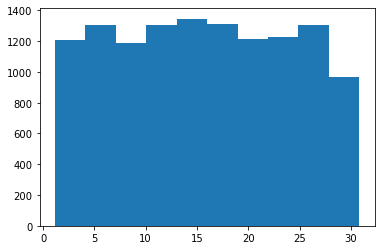

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist([predicted]);


Los accidentes entre los dias 10 y 23 hay mas concurrencia durante el año,
la predicción nos detalla que durante estos dias hay mas accidentalidad.

Debemos evaluar de forma más fina el comportamiento de nuestro modelo.

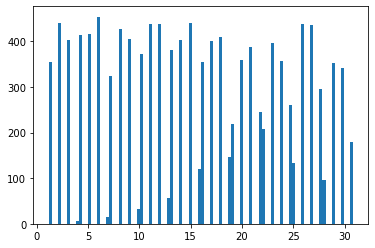

In [18]:
plt.hist([predicted], bins=100);

# Evaluando de forma más fina el comportamiento de nuestro modelo

El score r2 entre mas cercano al 1 es mejor, podemos entender su poder predictivo

In [19]:
model.score(X_test, y_test)

0.9998176755062007

Muy bueno el Score para un primer modelo

In [20]:
y_test.shape

(12363, 1)

In [22]:
predicted=predicted.reshape(12363,1)

In [25]:
residuals = y_test - predicted

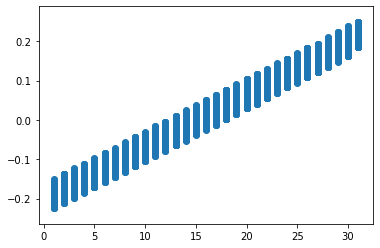

In [26]:
plt.scatter(y_test,residuals)

Errores porcentajes

In [27]:
ap_residuals = np.abs(residuals)/ y_test

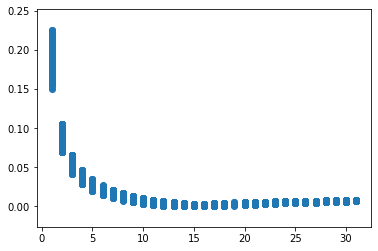

In [28]:
plt.scatter(y_test,ap_residuals)

para los primeros dias, tenemos unos errores bastantes altos

Aplicando una escala logaritmica

In [29]:
lap_residuals = np.log(ap_residuals)
lap_residuals

,DIA
2672,-5.252104
27590,-6.116019
23267,-7.520693
13295,-4.892828
26238,-3.802663
...,...
17916,-5.029861
28020,-5.448922
24284,-5.148312
12947,-5.404999


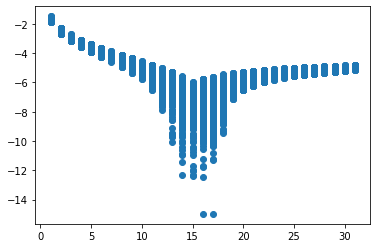

In [30]:
plt.scatter(y_test,lap_residuals)